In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

## LGBMRegressor & XGBRegressor

In [2]:
metric = "RMSE"

### Look Back Window Size & Lags

LookBackWindowSize
260    0.018119
520    0.018825
780    0.017975
Name: RMSE, dtype: float64


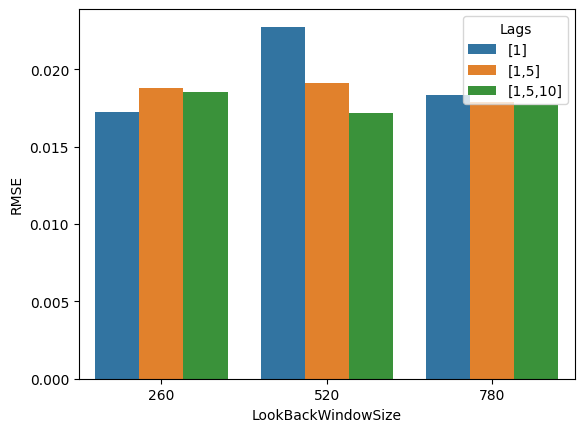

In [3]:
lbws = pd.read_csv("../../results/tuning/boosting_lbws_lags.csv", sep=";")
print(lbws.groupby("LookBackWindowSize")[metric].mean())
sns.barplot(x="LookBackWindowSize", y=metric, hue="Lags", data=lbws[lbws["Model"]=="LGBMRegressor"]);

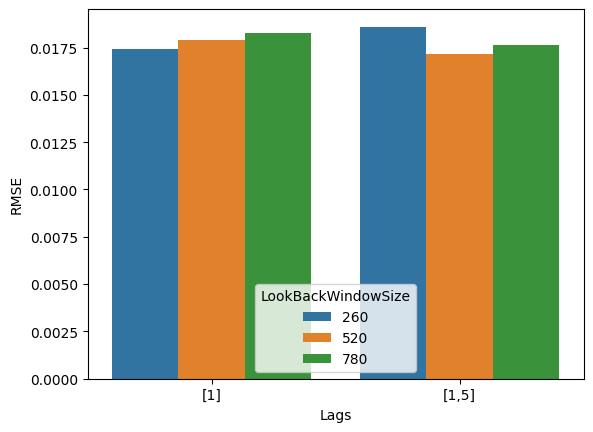

In [4]:
sns.barplot(x="Lags", y=metric, hue="LookBackWindowSize", data=lbws[lbws["Model"]=="XGBRegressor"]);

### Learning Rate

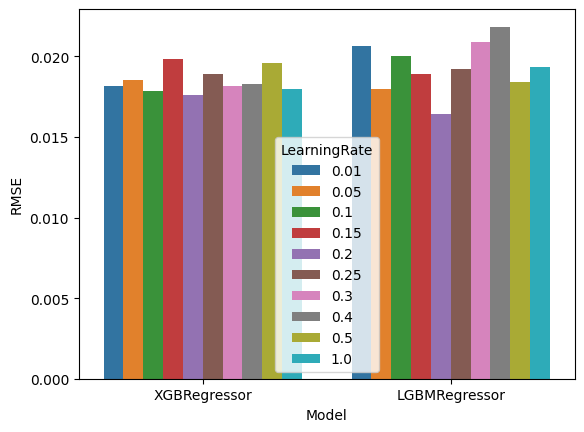

In [5]:
lr = pd.read_csv("../../results/tuning/boosting_lr.csv", sep=";")
sns.barplot(x="Model", y=metric, hue="LearningRate", data=lr);

### Estimators

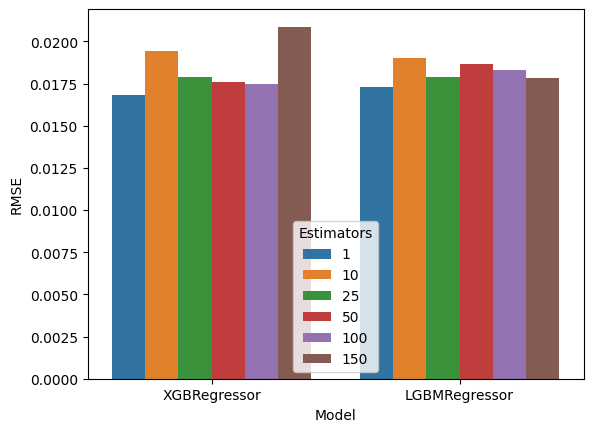

In [6]:
est = pd.read_csv("../../results/tuning/boosting_estimators.csv", sep=";")
sns.barplot(x="Model", y=metric, hue="Estimators", data=est);

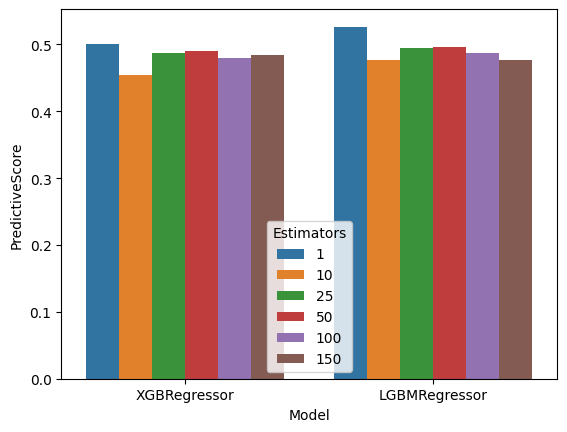

In [7]:
sns.barplot(x="Model", y="PredictiveScore", hue="Estimators", data=est);

### Conclusion
- Setting 'look_back_window' to 260, 'lags' to [1], and 'learning_rate' to 0.2, the best value for 'n_estimators' is 1; therefore, a simple decision tree is enough.